In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import functions as func

In [2]:
csv_file_path = r'Red.csv'
df_original_red = pd.read_csv(csv_file_path)
df_red = df_original_red.copy()
df_red.rename(columns={'Name': 'name', 'Country' : 'country', 'Region' : 'region', 'Winery' : 'winery', 'Rating' : 'rating', 'Price' : 'price', 'NumberOfRatings' : 'no_ratings', 'Year' : 'year'}, inplace=True)
df_red['type'] = 'red'

csv_file_path = r'White.csv'
df_original_white = pd.read_csv(csv_file_path)
df_white = df_original_white.copy()
df_white.rename(columns={'Name': 'name', 'Country' : 'country', 'Region' : 'region', 'Winery' : 'winery', 'Rating' : 'rating', 'Price' : 'price', 'NumberOfRatings' : 'no_ratings', 'Year' : 'year'}, inplace=True)
df_white['type'] = 'white'

csv_file_path = r'Sparkling.csv'
df_original_spark = pd.read_csv(csv_file_path)
df_spark = df_original_spark.copy()
df_spark.rename(columns={'Name': 'name', 'Country' : 'country', 'Region' : 'region', 'Winery' : 'winery', 'Rating' : 'rating','Price' : 'price', 'NumberOfRatings' : 'no_ratings', 'Year' : 'year'}, inplace=True)
df_spark['type'] = 'sparkling'

csv_file_path = r'Rose.csv'
df_original_rose = pd.read_csv(csv_file_path)
df_rose = df_original_rose.copy()
df_rose.rename(columns={'Name': 'name', 'Country' : 'country', 'Region' : 'region', 'Winery' : 'winery', 'Rating' : 'rating', 'Price' : 'price','NumberOfRatings' : 'no_ratings', 'Year' : 'year'}, inplace=True)
df_rose['type'] = 'rose'

In [3]:
df_rose.head(20)

,name,country,region,winery,rating,no_ratings,price,year,type
0,Mad Méditerranée Rosé 2019,France,Méditerranée,Château Camparnaud,4.0,25,10.11,2019,rose
1,Redoma Rosé 2019,Portugal,Douro,Niepoort,3.9,25,12.81,2019,rose
2,Fantini Cerasuolo d'Abruzzo 2019,Italy,Abruzzo,Farnese,3.6,25,5.60,2019,rose
3,Mount Hermon Rosé 2017,Israel,Galilee,Hermon,3.4,25,12.14,2017,rose
4,La Villa Rosé 2018,France,Languedoc,Château La Sauvageonne,4.6,25,68.95,2018,rose
5,La Rosé de Manincor 2019,Italy,Vigneti delle Dolomiti,Manincor,4.1,25,17.50,2019,rose
6,Mea Rosa 2019,Italy,Liguria,Lvnae,3.9,25,11.45,2019,rose
7,Amethystos Rosé 2013,Greece,Drama,Costa Lazaridi,3.8,25,9.70,2013,rose
8,Cinsault 2019,France,Pays d'Oc,Les Jamelles,3.6,26,5.56,2019,rose
9,Rosé 2019,South Africa,Paarl,Backsberg,3.5,26,6.45,2019,rose


In [4]:
df_red.columns

Index(['name', 'country', 'region', 'winery', 'rating', 'no_ratings', 'price',
       'year', 'type'],
      dtype='object')

In [5]:
dataframes = [df_red, df_white, df_spark, df_rose]
for df in dataframes:
    print(func.check_null_inf(df))   

Null value counts:
name          0
country       0
region        0
winery        0
rating        0
no_ratings    0
price         0
year          0
type          0
dtype: int64

Infinite value counts:
In 'rating' column: 0
In 'no_ratings' column: 0
In 'price' column: 0
None
Null value counts:
name          0
country       0
region        0
winery        0
rating        0
no_ratings    0
price         0
year          0
type          0
dtype: int64

Infinite value counts:
In 'rating' column: 0
In 'no_ratings' column: 0
In 'price' column: 0
None
Null value counts:
name          0
country       0
region        0
winery        0
rating        0
no_ratings    0
price         0
year          0
type          0
dtype: int64

Infinite value counts:
In 'rating' column: 0
In 'no_ratings' column: 0
In 'price' column: 0
None
Null value counts:
name          0
country       0
region        0
winery        0
rating        0
no_ratings    0
price         0
year          0
type          0
dtype: int64

I

In [6]:
combined_df = pd.concat([df_red, df_white, df_spark, df_rose])

combined_df.sort_values(by='year', inplace = True)

combined_df.head(10)

,name,country,region,winery,rating,no_ratings,price,year,type
77,‘61 Franciacorta Rosé 1961,Italy,Franciacorta,Berlucchi,3.8,37,18.91,1961,sparkling
623,‘61 Franciacorta Satèn 1961,Italy,Franciacorta,Berlucchi,3.9,421,19.90,1961,sparkling
521,‘61 Franciacorta Brut 1961,Italy,Lombardia,Berlucchi,3.9,282,17.95,1961,sparkling
2333,Hermitage La Chapelle Rouge 1988,France,Hermitage,Paul Jaboulet Aîné,4.3,203,209.60,1988,red
7902,Tignanello 1989,Italy,Toscana,Antinori,4.5,81,925.08,1989,red
2378,Pauillac (Premier Grand Cru Classé) 1989,France,Pauillac,Château Mouton Rothschild,4.6,2069,1168.77,1989,red
1067,Musigny Grand Cru (Cuveé Vieilles Vignes) 1990,France,Musigny Grand Cru,Domaine Comte Georges de Vogüé,4.4,137,995.00,1990,red
6612,Saint-Julien (Grand Cru Classé) 1990,France,Saint-Julien,Château Gruaud Larose,4.4,589,252.47,1990,red
6742,Pauillac (Premier Grand Cru Classé) 1991,France,Pauillac,Château Mouton Rothschild,4.4,603,866.59,1991,red
8056,Pauillac (Premier Grand Cru Classé) 1992,France,Pauillac,Château Mouton Rothschild,4.4,840,1071.29,1992,red


In [7]:
correlation = combined_df['rating'].corr(combined_df['price'])
print(correlation)

0.4506538996886249


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     8275.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:09:57   Log-Likelihood:                 1076.0
No. Observations:               13621   AIC:                            -2148.
Df Residuals:                   13619   BIC:                            -2133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7044      0.003   1449.523      0.0

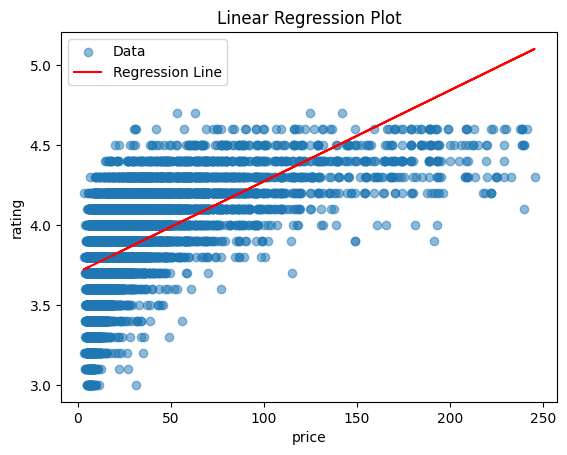

In [8]:
z_scores_price = stats.zscore(combined_df['price'])
z_scores_points = stats.zscore(combined_df['rating'])
threshold = 3

df_z_score = combined_df[(abs(z_scores_price) < threshold) & (abs(z_scores_points) < threshold)]

X = df_z_score['price']
y = df_z_score['rating']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

plt.scatter(X['price'], y, alpha=0.5, label='Data')
plt.plot(X['price'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('price')
plt.ylabel('rating')
plt.title('Linear Regression Plot')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:09:57   Log-Likelihood:                -11637.
No. Observations:               13621   AIC:                         2.328e+04
Df Residuals:                   13619   BIC:                         2.329e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4778      0.089    -84.135      0.0

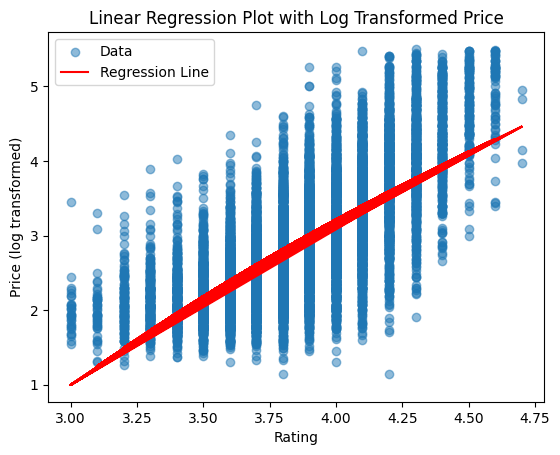

In [9]:
df_log = df_z_score.copy()


df_log['rating_log'] = np.log(df_log['rating'])
df_log['price_log'] = np.log(df_log['price'])


X_log = df_log['rating_log']
y_log = df_log['price_log']


X_log = sm.add_constant(X_log)


model_log = sm.OLS(y_log, X_log).fit()


print(model_log.summary())


plt.scatter(df_log['rating'], y_log, alpha=0.5, label='Data')
plt.plot(df_log['rating'], model_log.predict(X_log), color='red', label='Regression Line')
plt.xlabel('Rating')
plt.ylabel('Price (log transformed)')
plt.title('Linear Regression Plot with Log Transformed Price')
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:             price_sqrt   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                 1.177e+04
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:09:58   Log-Likelihood:                -25963.
No. Observations:               13621   AIC:                         5.193e+04
Df Residuals:                   13619   BIC:                         5.194e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -36.3586      0.379    -96.004      

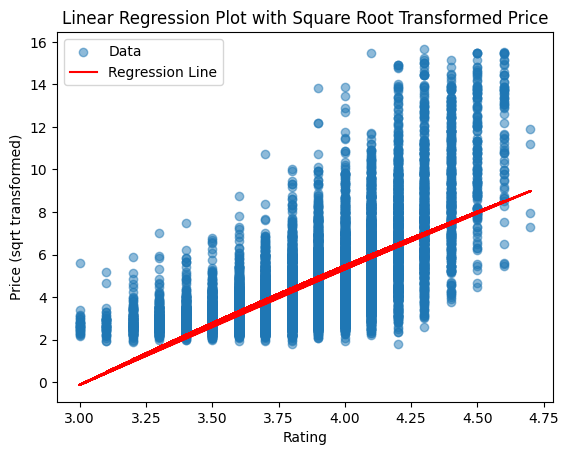

In [10]:
df_sqrt = df_z_score.copy()

df_sqrt['rating_sqrt'] = np.sqrt(df_sqrt['rating'])
df_sqrt['price_sqrt'] = np.sqrt(df_sqrt['price'])

X_sqrt = df_sqrt['rating_sqrt']
y_sqrt = df_sqrt['price_sqrt']


X_sqrt = sm.add_constant(X_sqrt)

model_sqrt = sm.OLS(y_sqrt, X_sqrt).fit()


print(model_sqrt.summary())

plt.scatter(df_sqrt['rating'], y_sqrt, alpha=0.5, label='Data')
plt.plot(df_sqrt['rating'], model_sqrt.predict(X_sqrt), color='red', label='Regression Line')
plt.xlabel('Rating')
plt.ylabel('Price (sqrt transformed)')
plt.title('Linear Regression Plot with Square Root Transformed Price')
plt.legend()
plt.show()


In [17]:
avg_price_rating_per_country = combined_df.groupby('country').agg({'price':'mean', 'rating':'mean'}).reset_index()

avg_price_rating_per_country = avg_price_rating_per_country.rename(columns={'price':'avg_price', 'rating':'avg_rating', 'country':'country'})

avg_price_rating_per_country = avg_price_rating_per_country.sort_values(by='avg_rating', ascending=False)

print(avg_price_rating_per_country)


           country  avg_price  avg_rating
20         Moldova  24.027500    4.175000
17         Lebanon  36.887500    4.137500
8          Croatia  21.966667    4.083333
9   Czech Republic  25.400000    4.050000
30  United Kingdom  57.770000    4.033333
11         Georgia  19.613077    3.976923
10          France  55.539331    3.932829
31   United States  43.719170    3.888302
16           Italy  29.264825    3.880225
12         Germany  21.907990    3.867779
22        Portugal  17.751786    3.862202
21     New Zealand  20.660970    3.843636
28     Switzerland  28.949130    3.826087
18      Luxembourg  19.202143    3.821429
2          Austria  20.405610    3.815650
0        Argentina  20.918669    3.814610
27           Spain  22.479850    3.809915
26    South Africa  18.261939    3.802246
4         Bulgaria  10.150000    3.800000
1        Australia  36.781132    3.788050
32         Uruguay  14.492000    3.780000
24        Slovakia  19.900000    3.750000
15          Israel  15.835217    3

C:\Users\gijsv\AppData\Local\Temp\ipykernel_24740\1625656860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y='country', data=avg_price_rating_per_country, palette='viridis')


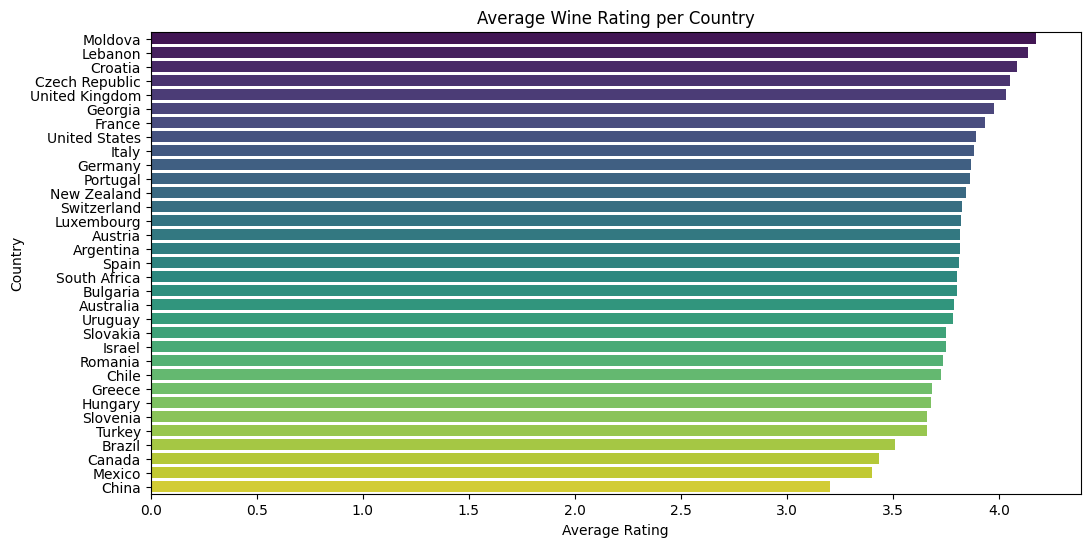

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_rating', y='country', data=avg_price_rating_per_country, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.title('Average Wine Rating per Country')
plt.show()

In [18]:
avg_price_rating_per_country = combined_df.groupby('country').agg({'price': 'mean', 'rating': 'mean'}).reset_index()

avg_price_rating_per_country['rating_per_price_ratio'] = avg_price_rating_per_country['rating'] / avg_price_rating_per_country['price']

avg_price_rating_per_country = avg_price_rating_per_country.rename(columns={'price': 'avg_price', 'rating': 'avg_rating', 'country': 'country'})

avg_price_rating_per_country = avg_price_rating_per_country.sort_values(by='rating_per_price_ratio', ascending=False)

print(avg_price_rating_per_country)

           country  avg_price  avg_rating  rating_per_price_ratio
19          Mexico   8.650000    3.400000                0.393064
4         Bulgaria  10.150000    3.800000                0.374384
23         Romania  12.816216    3.735135                0.291438
25        Slovenia  13.050000    3.661111                0.280545
14         Hungary  13.366842    3.678947                0.275229
32         Uruguay  14.492000    3.780000                0.260834
15          Israel  15.835217    3.747826                0.236677
13          Greece  15.640800    3.684000                0.235538
5           Canada  14.933333    3.433333                0.229911
29          Turkey  15.960000    3.660000                0.229323
22        Portugal  17.751786    3.862202                0.217567
26    South Africa  18.261939    3.802246                0.208206
11         Georgia  19.613077    3.976923                0.202769
3           Brazil  17.399800    3.510000                0.201726
18      Lu

In [13]:
countries_of_interest = ['France', 'Italy', 'Spain', 'Portugal']

filtered_df = combined_df[combined_df['country'].isin(countries_of_interest)]

avg_price_rating_per_region = filtered_df.groupby(['country', 'region']).agg({'price':'mean', 'rating':'mean'}).reset_index()

avg_price_rating_per_region.rename(columns={'price':'avg_price', 'rating':'avg_rating', 'country':'country'}, inplace = True)

avg_price_rating_per_region

,country,region,avg_price,avg_rating
0,France,Aloxe-Corton,46.440000,4.000000
1,France,Alsace,21.289710,3.778261
2,France,Alsace Grand Cru,21.718333,3.933333
3,France,Alsace Grand Cru 'Engelberg',28.500000,4.300000
4,France,Alsace Grand Cru 'Geisberg',62.370000,4.350000
...,...,...,...,...
584,Spain,Valdepeñas,6.314706,3.435294
585,Spain,Valencia,9.799706,3.732353
586,Spain,Valtiendas,19.950000,3.900000
587,Spain,Vino de España,8.100000,3.700000


In [14]:
grouped = avg_price_rating_per_region.groupby('country')

top_regions_per_country = []

for country, group in grouped:
    sorted_group = group.sort_values(by='avg_rating', ascending=False)

    top_regions = sorted_group.head(5)
    top_regions_per_country.append(top_regions)

top_regions_per_country = pd.concat(top_regions_per_country, ignore_index=True)

print(top_regions_per_country)

     country                        region   avg_price  avg_rating
0     France          Montrachet Grand Cru  681.370000    4.900000
1     France   Bâtard-Montrachet Grand Cru  520.000000    4.600000
2     France    Mazis-Chambertin Grand Cru  185.950000    4.500000
3     France        Clos Vougeot Grand Cru  182.290000    4.450000
4     France  Corton-Charlemagne Grand Cru  199.712143    4.428571
5      Italy            Bolgheri Sassicaia  400.072500    4.625000
6      Italy            Bolgheri Superiore   81.407333    4.323333
7      Italy                        Sebino   49.500000    4.300000
8      Italy                       Rosazzo   45.000000    4.300000
9      Italy     Sforzato della Valtellina   40.916667    4.266667
10  Portugal                         Borba   42.140000    4.233333
11  Portugal                      Almeirim   23.950000    4.100000
12  Portugal                         Douro   22.630600    3.933000
13  Portugal                    Alentejano   19.445698    3.92

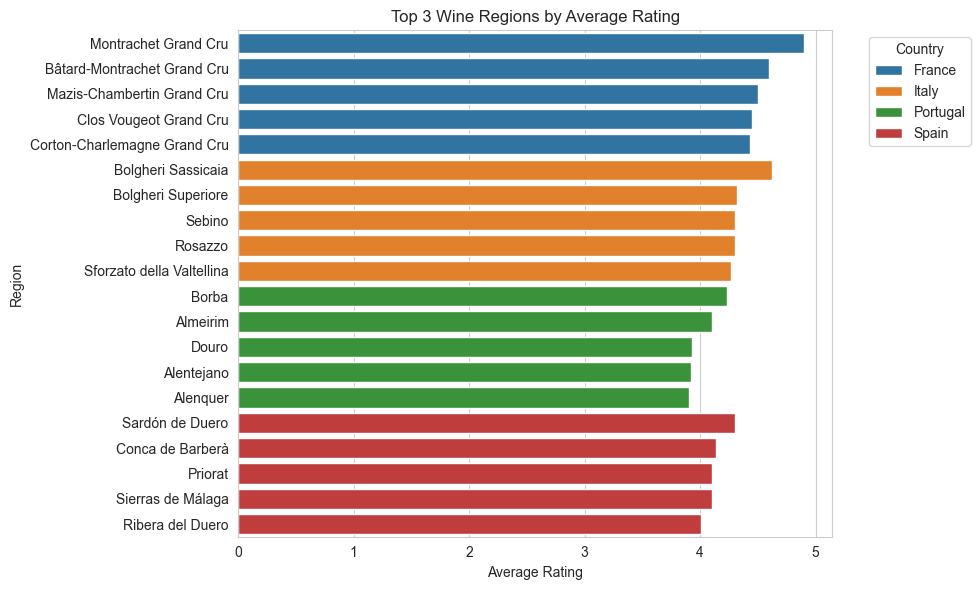

In [15]:
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_rating', y='region', hue='country', data=top_regions_per_country)
plt.title('Top 3 Wine Regions by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Region')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()